In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

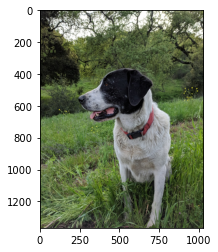

In [3]:
full = cv2.imread('data/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

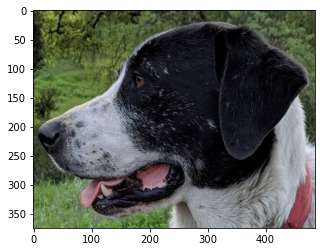

In [5]:
face = cv2.imread('data/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

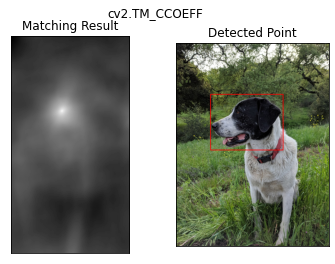

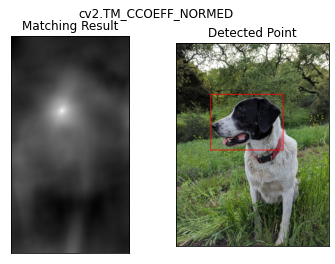

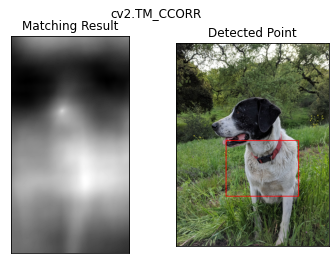

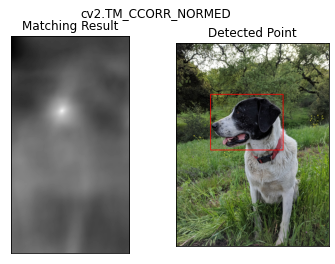

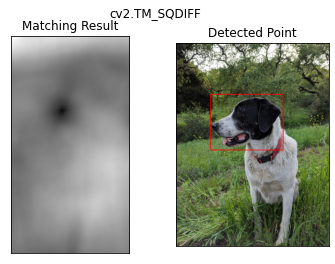

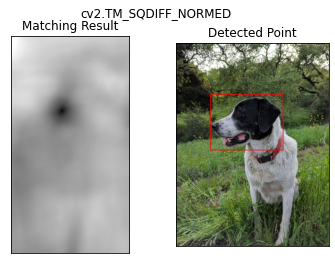

In [12]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:

    full_copy = full.copy()
    method = eval(meth)
    

    res = cv2.matchTemplate(full_copy,face,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    h, w, c = face.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 4)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(full_copy,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()